<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">🌿 Plant Disease Classification🦠</h1>
</div>

![](https://i.imgur.com/C9fCCpP.png)

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">📚 Importing Libraries 📚</h2>
</div>


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from PIL import Image
from keras.utils import plot_model
from zipfile import ZipFile, BadZipFile
import random as r
import warnings
import matplotlib.patches as patches
warnings.filterwarnings('ignore')

2024-06-07 20:16:26.303385: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 20:16:26.303553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 20:16:26.449165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">🛠️ Building Functions & Basic Exploration🔧</h2>
</div>


In [2]:
train_path = '/kaggle/input/plant-disease-recognition-dataset/Train/Train'
test_path = '/kaggle/input/plant-disease-recognition-dataset/Test/Test'
validation_path = '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation'

In [3]:
os.listdir(validation_path)

['Healthy', 'Rust', 'Powdery']

In [4]:
def count_files_in_folder(path):
  folder_data = []
  for fol in os.listdir(path):
    folder_path = os.path.join(path, fol)
    fil = os.listdir(folder_path)
    num_files = 0
    for item in fil:
      if os.path.isfile(os.path.join(folder_path, item)):
        num_files +=1

    folder_data.append([fol, num_files])


  return folder_data

In [5]:
train_data = count_files_in_folder(train_path)
test_data = count_files_in_folder(test_path)
validation_data = count_files_in_folder(validation_path)

In [6]:
train_df = pd.DataFrame(train_data, columns =['Folder', 'Total Files'])
test_df = pd.DataFrame(test_data, columns =['Folder', 'Total Files'])
validation_df = pd.DataFrame(validation_data, columns =['Folder', 'Total Files'])

In [7]:
train_df['Type'] = 'Train'
test_df['Type'] = 'Test'
validation_df['Type'] = 'Validation'

In [8]:
combined_df = pd.concat([train_df, test_df, validation_df])

In [9]:
combined_df

Folder  Total Files        Type
0  Healthy          458       Train
1     Rust          434       Train
2  Powdery          430       Train
0  Healthy           50        Test
1     Rust           50        Test
2  Powdery           50        Test
0  Healthy           20  Validation
1     Rust           20  Validation
2  Powdery           20  Validation

<Axes: xlabel='Folder', ylabel='Total Files'>

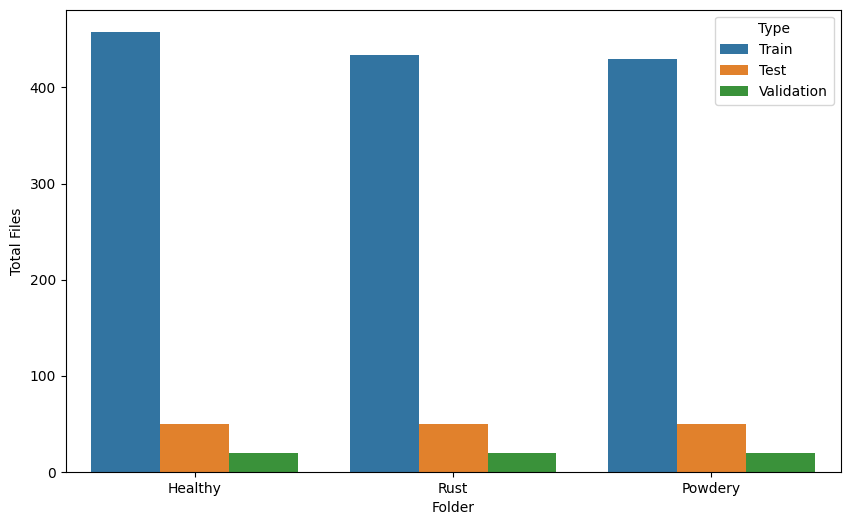

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Folder', y ='Total Files', hue ='Type', data =combined_df)

In [11]:
def plot_sample_img(path_folder, sample_size = 5):
  images =[]
  all_file = [f for f in os.listdir(path_folder) if os.path.isfile(os.path.join(path_folder, f))]
  sample_file = r.sample(all_file, sample_size)

  for img in sample_file:
    path = os.path.join(path_folder, img)
    image = Image.open(path)
    images.append(image)

  return images

In [12]:
train_healthy = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/Healthy'
train_Powdery = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/Powdery'
train_Rust = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/Rust'

In [13]:
healthy_img = plot_sample_img(train_healthy)
powdery_img = plot_sample_img(train_Powdery)
rust_img = plot_sample_img(train_Rust)

In [14]:
all_img = [healthy_img, powdery_img,  rust_img]

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">📊 Plants Image Visualization 📈</h2>
</div>


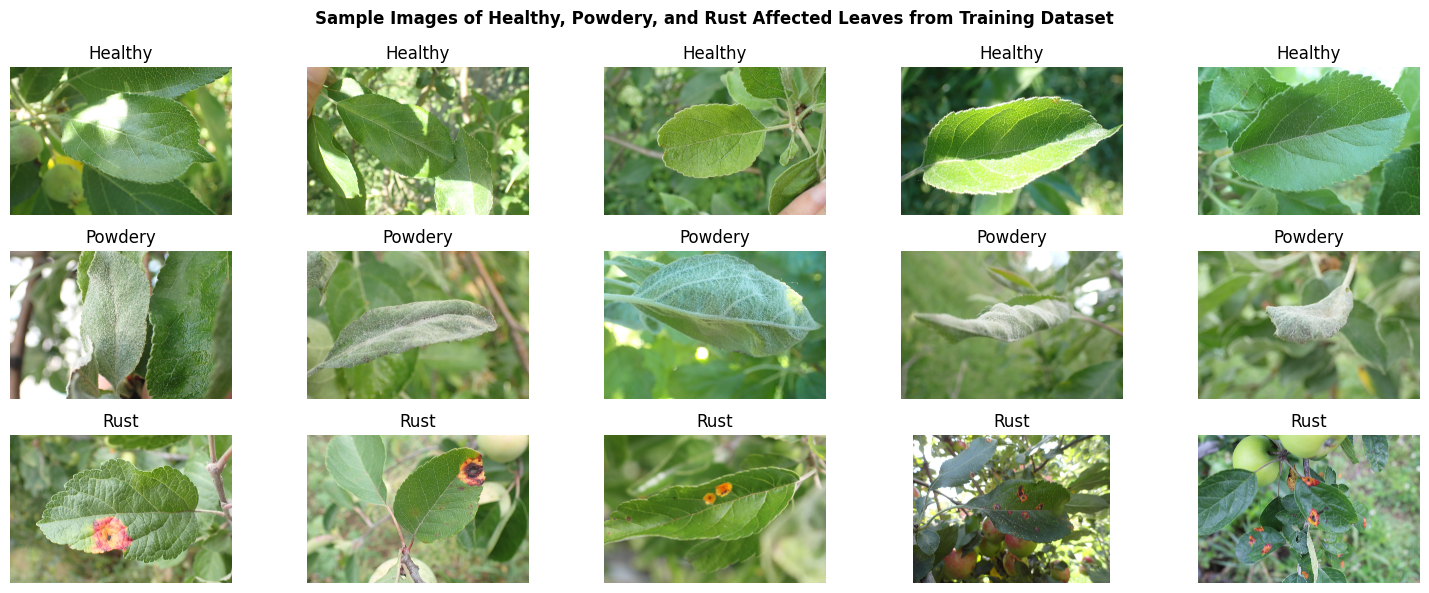

In [15]:
fig, axes = plt.subplots(3, len(healthy_img), figsize=(15,6))
title = ['Healthy', 'Powdery', 'Rust']
for row, category in enumerate(all_img):
  for i, img in enumerate(category):
    axes[row, i].imshow(img)
    axes[row, i].set_title(title[row])
    axes[row, i].axis('off')

plt.suptitle('Sample Images of Healthy, Powdery, and Rust Affected Leaves from Training Dataset', fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">📁 Data Loading and Augmentation 🔄</h2>
</div>


In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale = 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [18]:
train_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">🧠 Creating Model 🧠</h2>
</div>


In [19]:
model = Sequential()

model.add(Conv2D(56, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(28, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
16
model.add(Dense(32, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
 2/42 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3203 - loss: 1.1273  

I0000 00:00:1717791454.843710      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717791454.864564      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/42 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3479 - loss: 1.1180

W0000 00:00:1717791495.167541      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3659 - loss: 1.1036

W0000 00:00:1717791538.906179      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3669 - loss: 1.1028 - val_accuracy: 0.4000 - val_loss: 1.0681
Epoch 2/10


W0000 00:00:1717791542.739461      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3873 - loss: 1.0869 - val_accuracy: 0.4833 - val_loss: 0.8977
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5753 - loss: 0.8936 - val_accuracy: 0.5833 - val_loss: 0.7343
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6882 - loss: 0.6768 - val_accuracy: 0.6333 - val_loss: 0.6937
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6679 - loss: 0.6633 - val_accuracy: 0.6333 - val_loss: 0.7547
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6872 - loss: 0.6783 - val_accuracy: 0.7333 - val_loss: 0.6296
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7950 - loss: 0.5108 - val_accuracy: 0.8167 - val_loss: 0.4502
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8861 - loss: 0.3772 - val_accuracy: 0.8500 - val_loss: 0.4839
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8761 - loss: 0.3639 - val_accuracy: 0.8167 - val_loss: 0.4112
Ep

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">📈 Plotting Loss & Accuracy 📈</h2>
</div>


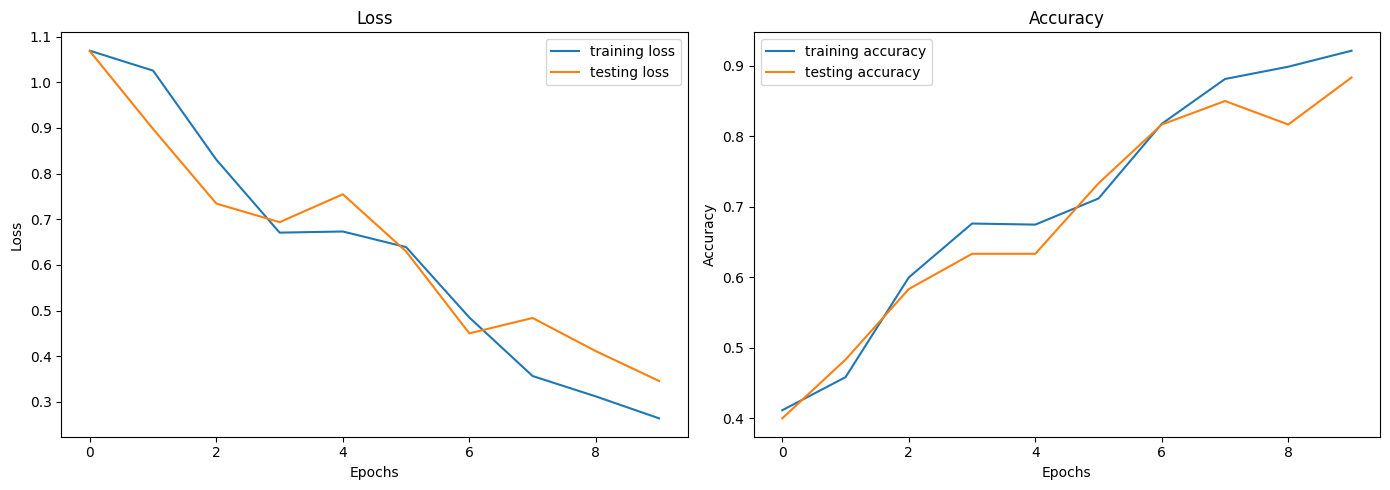

In [22]:
fig, axes = plt.subplots(1,2 , figsize =(14, 5))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">📊 Model Evaluation 📉</h2>
</div>


In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8989 - loss: 0.2739
Testing Loss: 0.26566120982170105
Testing Accuracy: 0.8933333158493042


W0000 00:00:1717792437.362376      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">🔮 Model Prediction 🔮</h2>
</div>


In [24]:
def process_image(img, target_size=(224, 224)):
    # If img is a path, load the image
    if isinstance(img, str):
        img = image.load_img(img, target_size=target_size)
    else:
        # If img is a PIL image, resize it
        img = img.resize(target_size)
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

In [25]:
test_healthy = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy'
test_Powdery = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/Powdery'
test_Rust = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/Rust'

In [26]:
img_healthy = plot_sample_img(test_healthy)
img_Powdery = plot_sample_img(test_Powdery)
img_Rust = plot_sample_img(test_Rust)

In [27]:
train_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


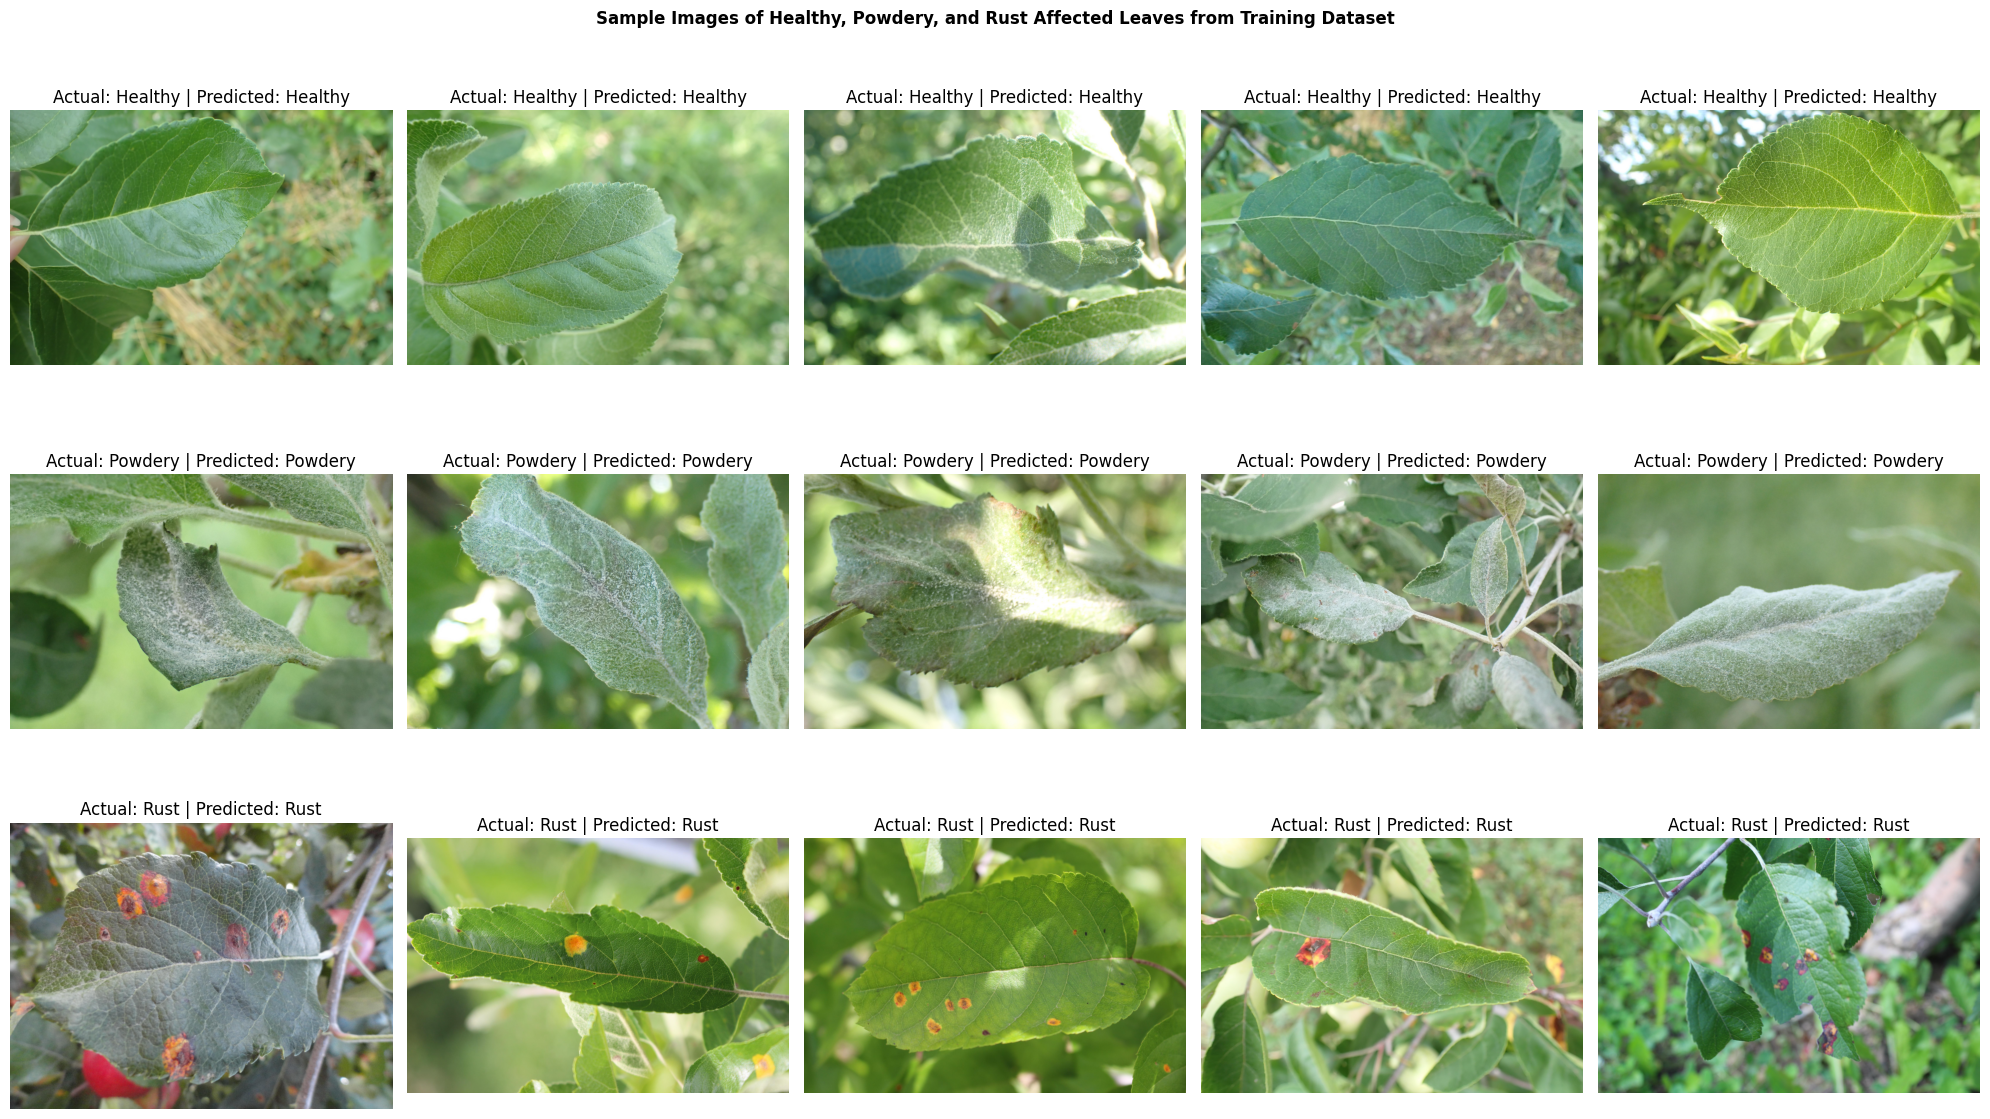

In [28]:
test_img = [img_healthy, img_Powdery, img_Rust]
fig, axes = plt.subplots(3, len(healthy_img), figsize=(20,12))
title = ['Actual: Healthy', 'Actual: Powdery', 'Actual: Rust']
for row, category in enumerate(test_img):
  for i, img in enumerate(category):
    processed_img = process_image(img)
    pred = model.predict(processed_img)
    ind = np.argmax(pred)
    
    if ind == 0:
        pred_title = ' | Predicted: Healthy'
    elif ind == 1:
        pred_title = ' | Predicted: Powdery'
    else: 
        pred_title = ' | Predicted: Rust'
    axes[row, i].imshow(img)
    axes[row, i].set_title(title[row] + pred_title)
    axes[row, i].axis('off')

plt.suptitle('Sample Images of Healthy, Powdery, and Rust Affected Leaves from Training Dataset', fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-radius: 30px; border: 3px solid #000000; padding: 20px; background-color: #6dbb93; text-align: center; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 20px; font-family: Arial, sans-serif;">🌱 Conclusion 🌱</h2>
    <p style="color: #ffffff; font-family: Arial, sans-serif;">In this project, we utilized data augmentation with the <code>ImageDataGenerator</code> to enhance our dataset. We trained a custom Convolutional Neural Network (CNN) model, consisting of 3 convolutional layers and 2 dense layers.</p>
    <p style="color: #ffffff; font-family: Arial, sans-serif;">Our model was trained using the <code>categorical_crossentropy</code> loss function and the <code>adam</code> optimizer. The training results were impressive, achieving an accuracy of 90.19% and a loss of 0.2848. On the validation data, we observed an accuracy of 85.00% and a loss of 0.3542.</p>
    <p style="color: #ffffff; font-family: Arial, sans-serif;">For the testing phase, our model achieved a Testing Loss of 0.3784 and a Testing Accuracy of 85.33%.</p>
    <p style="color: #ffffff; font-family: Arial, sans-serif; font-weight: bold; margin-top: 20px;">If you found this notebook helpful, please consider upvoting! 👍</p>
</div>
